<a href="https://colab.research.google.com/github/Johnnyyy24/FTX_BULL-BEAR/blob/main/FTX_BULL%26BEAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ccxt

     |████████████████████████████████| 2.0 MB 5.1 MB/s 
     |████████████████████████████████| 1.3 MB 47.3 MB/s 
     |████████████████████████████████| 294 kB 66.3 MB/s 
     |████████████████████████████████| 3.0 MB 42.6 MB/s 
     |████████████████████████████████| 142 kB 71.5 MB/s 
     |████████████████████████████████| 291 kB 76.0 MB/s 


In [98]:
import ccxt
import matplotlib.pyplot as plt 
import pandas as pd
exchange = ccxt.ftx({'enableRateLimit': True})
since = exchange.parse8601('2021-04-01T00:00:00Z')
params_bull = {'market_name': 'BULL/USD'}  # https://github.com/ccxt/ccxt/wiki/Manual#overriding-unified-api-params
params_bear = {'market_name': 'BEAR/USD'}  # https://github.com/ccxt/ccxt/wiki/Manual#overriding-unified-api-params
params_btc = {'market_name': 'BTC/USD'}
limit = None
# specify any existing symbol here ↓ (it does not matter, because it is overrided in params)
ohlcv_bull = exchange.fetch_ohlcv('BULL/USD', '4h', since, limit, params_bull)
ohlcv_bear = exchange.fetch_ohlcv('BEAR/USD', '4h', since, limit, params_bear)
ohlcv_btc = exchange.fetch_ohlcv('BTC/USDT', '4h', since, limit, params_btc)

In [99]:
bull = pd.DataFrame(ohlcv_bull,columns=['timestamp','open','high','low','close','volume'])
bear = pd.DataFrame(ohlcv_bear,columns=['timestamp','open','high','low','close','volume'])
btc = pd.DataFrame(ohlcv_btc,columns=['timestamp','open','high','low','close','volume'])

In [100]:
from datetime import datetime 
datetimes = []
for timestamp in bull['timestamp']:
    datetimes.append(datetime.fromtimestamp(timestamp//1000))

bull['dates'] = datetimes
bear['dates'] = datetimes
btc['dates'] = datetimes 
bull

,timestamp,open,high,low,close,volume,dates
0,1617235200000,82550.0,84600.0,82375.0,83775.0,2.346378e+05,2021-04-01 00:00:00
1,1617249600000,83775.0,84075.0,81350.0,82500.0,2.822873e+05,2021-04-01 04:00:00
2,1617264000000,82500.0,84950.0,79425.0,81225.0,6.302989e+05,2021-04-01 08:00:00
3,1617278400000,81225.0,83850.0,80475.0,82800.0,3.394773e+05,2021-04-01 12:00:00
4,1617292800000,82800.0,83500.0,78300.0,82325.0,5.004707e+05,2021-04-01 16:00:00
...,...,...,...,...,...,...,...
922,1630512000000,10405.0,11420.0,10337.5,10830.0,1.312746e+06,2021-09-01 16:00:00
923,1630526400000,10830.0,11310.0,10792.5,11255.0,4.685780e+05,2021-09-01 20:00:00
924,1630540800000,11255.0,11985.0,11095.0,11785.0,6.813862e+05,2021-09-02 00:00:00
925,1630555200000,11785.0,12290.0,11595.0,11955.0,6.613801e+05,2021-09-02 04:00:00


## Case 1: 7/20到現在 上漲趨勢

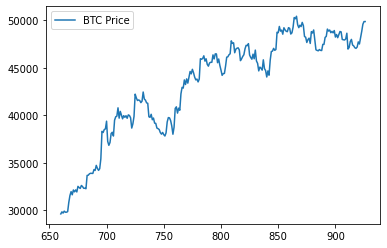

In [101]:
# 加一個BTC的圖
date_condition = bull['dates'] >= datetime(2021,7,20)
bull_partial = bull[date_condition]
bear_partial = bear[date_condition]
btc_partial = btc[date_condition]

btc_partial['close'].plot(label='BTC Price')
plt.legend()
plt.show()

In [74]:
bull_ret = (bull_partial['close'] - bull_partial['close'].shift()) / bull_partial['close'].shift()
bear_ret = (bear_partial['close'] - bear_partial['close'].shift()) / bear_partial['close'].shift()

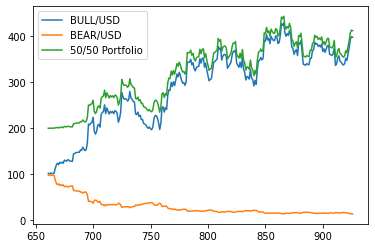

In [75]:
# if both invested $100 
bull_equity = 100 * (1 + bull_ret).cumprod()
bear_equity = 100 * (1 + bear_ret).cumprod()

bull_equity.plot(label='BULL/USD')
bear_equity.plot(label='BEAR/USD')
(bull_equity+bear_equity).plot(label='50/50 Portfolio')

plt.legend()
plt.show()

## Case 2: 4/1 - 6/30 下跌後盤整

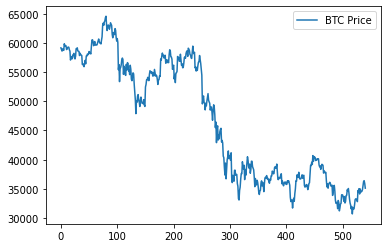

In [103]:
# 加一個BTC的圖
date_condition = (bull['dates'] >= datetime(2021,4,1)) & (bull['dates'] <= datetime(2021,6,30))
bull_partial = bull[date_condition]
bear_partial = bear[date_condition]
btc_partial = btc[date_condition]

btc_partial['close'].plot(label='BTC Price')
plt.legend()
plt.show()

In [77]:
bull_ret = (bull_partial['close'] - bull_partial['close'].shift()) / bull_partial['close'].shift()
bear_ret = (bear_partial['close'] - bear_partial['close'].shift()) / bear_partial['close'].shift()

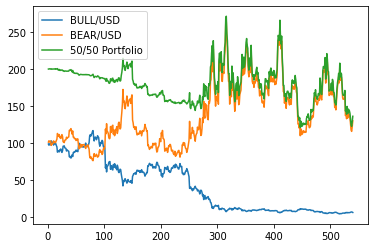

In [78]:
# if both invested $100 
bull_equity = 100 * (1 + bull_ret).cumprod()
bear_equity = 100 * (1 + bear_ret).cumprod()

bull_equity.plot(label='BULL/USD')
bear_equity.plot(label='BEAR/USD')
(bull_equity+bear_equity).plot(label='50/50 Portfolio')

plt.legend()
plt.show()

## Case 3: 5/20 - 7/20 盤整

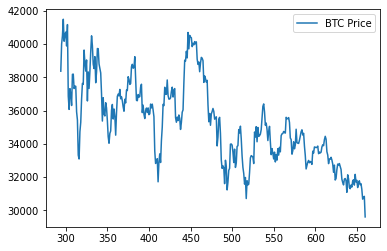

In [104]:
# 加一個BTC的圖
date_condition = (bull['dates'] >= datetime(2021,5,20)) & (bull['dates'] <= datetime(2021,7,20))
bull_partial = bull[date_condition]
bear_partial = bear[date_condition]
btc_partial = btc[date_condition]

btc_partial['close'].plot(label='BTC Price')
plt.legend()
plt.show()

In [80]:
bull_ret = (bull_partial['close'] - bull_partial['close'].shift()) / bull_partial['close'].shift()
bear_ret = (bear_partial['close'] - bear_partial['close'].shift()) / bear_partial['close'].shift()

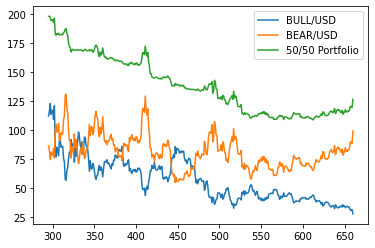

In [81]:
# if both invested $100 
bull_equity = 100 * (1 + bull_ret).cumprod()
bear_equity = 100 * (1 + bear_ret).cumprod()

bull_equity.plot(label='BULL/USD')
bear_equity.plot(label='BEAR/USD')
(bull_equity+bear_equity).plot(label='50/50 Portfolio')

plt.legend()
plt.show()